In [414]:
%reset

In [426]:
# Code for calculating powder mass flow from offline weigh data
# Created: 06-14-2024
# Modified: 05-23-2024

# Analysis for DATE DATE DATE

import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import importlib
from pathlib import Path


from powder_functions import *
import powder_functions
powder_functions = importlib.reload(powder_functions)

# Copy + paste files to analyze in data
# Set variables (RPM and step time) based on experimental parameters
# Run program
# Ideally, plot exported csv files in R


# Variables

In [416]:
# IF ANALYZING MORE THAN 1 DATASET, ***EXPERIMENTAL VARIABLES MUST BE THE SAME***
# Range of RPMs and time steps must be equal

# Folder name for exported files
experimentID = "(230306) PML SS316L Nb 0.1-0.5"

# List range of RPMs tested
RPM = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Designate start and end times for RPM changes
# Experiment start deposition, end deposition, time period at a single RPM
start_time = np.arange(10, 100, 20)
end_time = np.arange(20, 110, 20)

# Import Data

In [418]:
csv = [os.path.splitext(file)[0] for file in os.listdir("data/") if file.endswith('.csv')]
print(csv)

importData = {}
data = {}

for file in csv:
    filepath = os.path.join("data/", file + ".csv")
    importData[file] = pd.read_csv(filepath)
    filename = file.replace('.csv', '')

['(230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5', '(230306) 3_Powder_mass_flow_PML_Nb_0.1-0.5', '(230306) 4_Powder_mass_flow_PML_Nb_0.1-0.5']


# Clean Data

In [427]:
clean_data = {}

for file in csv:
    clean_data[file] = cleanData(importData[file])

print(clean_data)

{'(230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5':          Time    Mass
627     0.142  0.0001
628     0.153  0.1579
629     0.164  0.1695
630     0.175  0.1800
631     0.185  0.1899
...       ...     ...
9766   99.964  9.2770
9767   99.976  9.2824
9768   99.987  9.2879
9769   99.998  9.2931
9770  100.008  9.2975

[9144 rows x 2 columns], '(230306) 3_Powder_mass_flow_PML_Nb_0.1-0.5':         Time    Mass
3619   0.141 -0.0053
3620   0.152  0.2343
3621   0.163  0.2445
3622   0.174  0.2511
3623   0.185  0.2542
...      ...     ...
9897  68.714  4.2163
9898  68.725  4.2172
9899  68.736  4.2181
9900  68.747  4.2191
9901  68.758  4.2373

[6283 rows x 2 columns], '(230306) 4_Powder_mass_flow_PML_Nb_0.1-0.5':          Time    Mass
7466    0.142  0.0056
7467    0.153  0.1861
7468    0.164  0.1855
7469    0.175  0.1707
7470    0.185  0.1535
...       ...     ...
10851  37.116  2.3769
10852  37.126  2.3803
10853  37.137  2.3849
10854  37.148  2.3899
10855  37.159  2.3944

[3390 rows x 2 columns]}


# Calculate Steady State Mass Flow

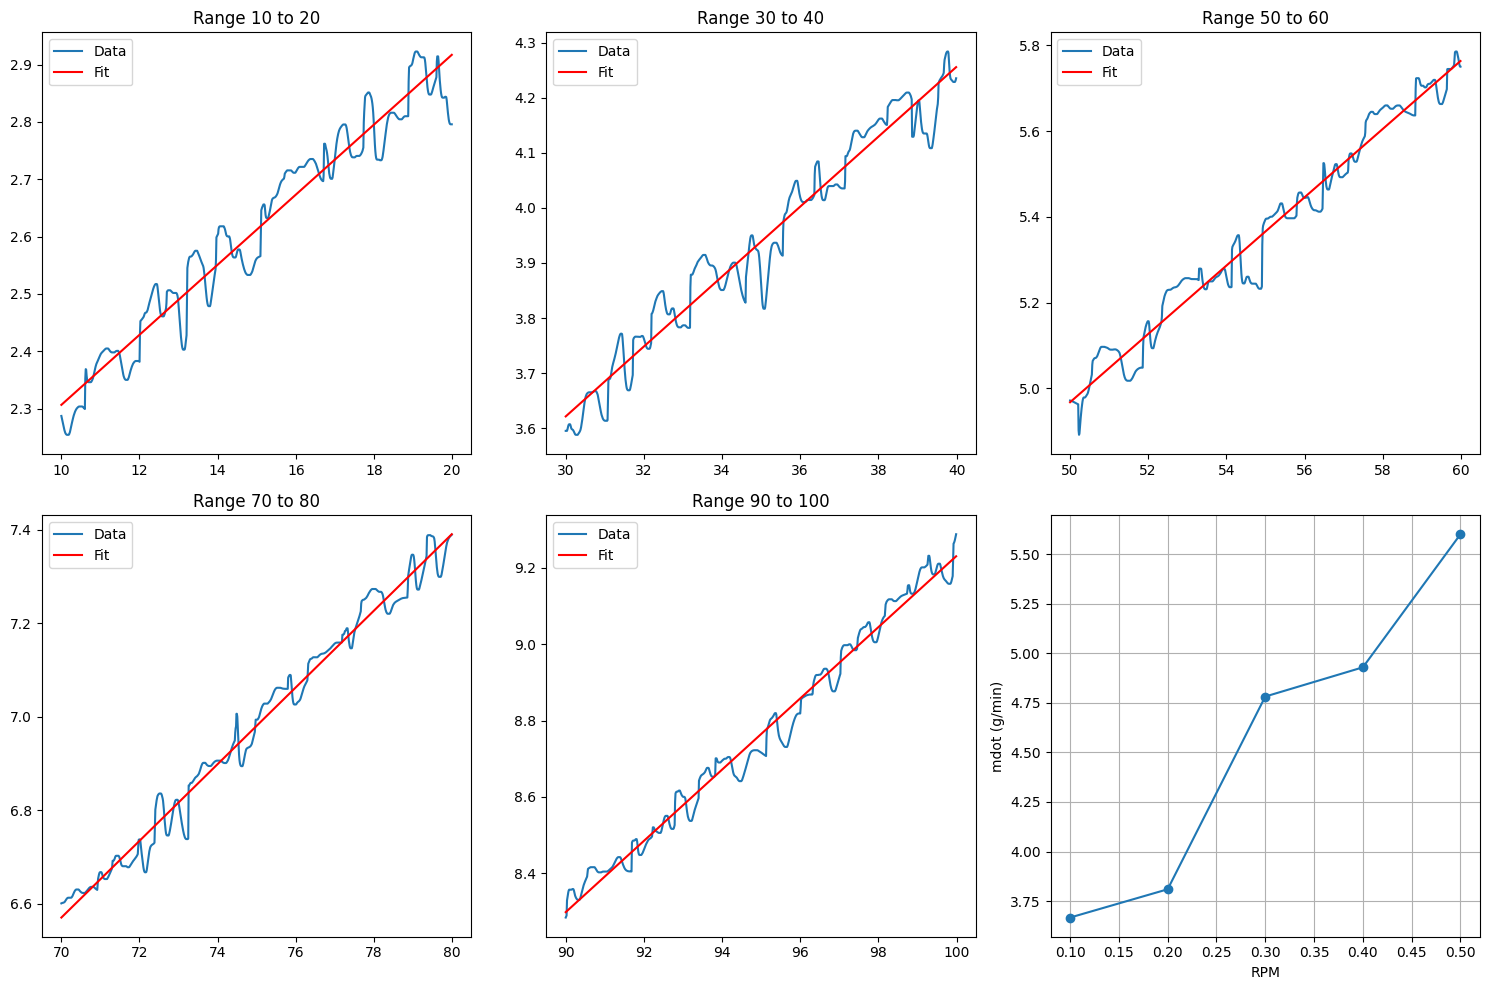

ValueError: Inputs must not be empty.

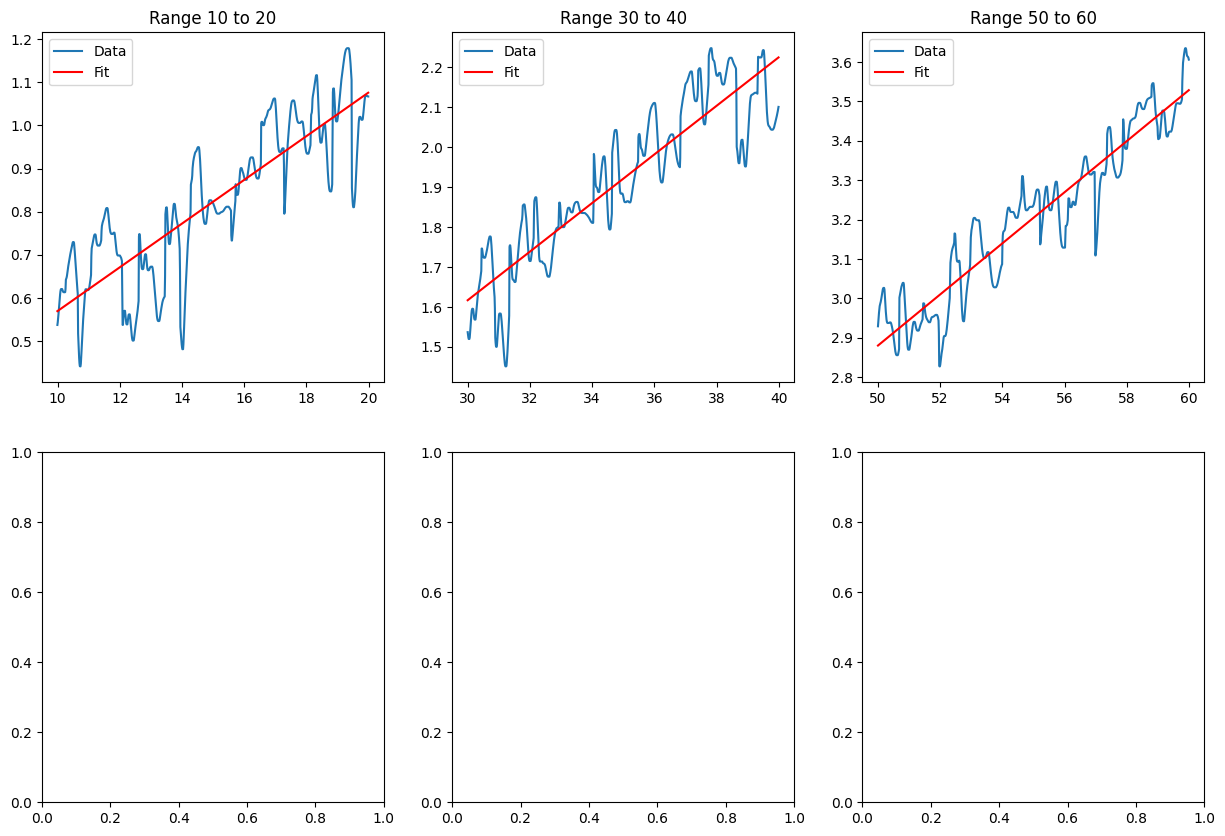

In [428]:
mass_flow = {}

for file in csv:
    mass_flow[file] = getMassFlow(clean_data[file], RPM, start_time, end_time)

print(mass_flow)



# Plot Mass Flow

In [ ]:
"""fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(len(start_time)):
        # Segment data into chunks for a single RPM
        start_RPM = np.argmin(np.abs(df['Time'] - start_time[i]))
        end_RPM = np.argmin(np.abs(df['Time'] - end_time[i]))

        time_RPM = df['Time'][start_RPM:end_RPM]
        mass_RPM = df['Mass'][start_RPM:end_RPM]

        # Fit linear model
        slope, intercept, _, _, _ = linregress(time_RPM, mass_RPM)
        mdot[i] = slope

        # Plot fitted line
        axs[i // 3, i % 3].plot(time_RPM, mass_RPM, label='Data')
        axs[i // 3, i % 3].plot(time_RPM, intercept + slope * time_RPM, 'r-', label='Fit')
        axs[i // 3, i % 3].set_title(f'Range {start_time[i]} to {end_time[i]}')
        axs[i // 3, i % 3].legend()

    # Plot RPM vs mdot
    plt.subplot(2, 3, 6)
    plt.plot(RPM, mdot * 60, 'o-')
    plt.xlabel('RPM')
    plt.ylabel('mdot (g/min)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()"""

# Save Files

In [423]:
export_path = os.path.join("export", experimentID)

# Make a folder in export to save procesed files
if not os.path.exists(export_path):
    os.makedirs(export_path)

for file in csv:
    clean_data[file].to_csv(os.path.join(export_path, file + "_CLEAN.csv"), index=False)
    mass_flow[file].to_csv(os.path.join(export_path, file + "_MASSFLOW.csv"), index=False)

# Make a folder in archive to move raw files
if not os.path.exists(os.path.join("data/archive/", experimentID)):
    os.makedirs(os.path.join("data/archive/", experimentID))


# Summarize Data

In [425]:
#for file in csv:
summary = pd.concat([pd.DataFrame(mass_flow[file], columns=['Mass Flow [g/min]']) for file in csv], axis=1, ignore_index=True)
summary.columns = csv
summary.insert(0, "RPM", RPM)
summary.to_csv(export_path + "/_SUMMARY.csv", index=False)

print(summary)

   RPM  (230306) 2_Powder_mass_flow_PML_SS316L_0.1-0.5  \
0  0.1                                        4.576785   
1  0.2                                        4.539333   
2  0.3                                        4.450673   
3  0.4                                        4.967176   
4  0.5                                        5.510374   

   (230306) 3_Powder_mass_flow_PML_Nb_0.1-0.5  \
0                                    2.978729   
1                                    2.663879   
2                                    3.585751   
3                                    3.431473   
4                                    4.082372   

   (230306) 4_Powder_mass_flow_PML_Nb_0.1-0.5  
0                                    2.448694  
1                                    2.472592  
2                                    3.166744  
3                                    3.562516  
4                                    4.375925  
